<br>
<u>Notebook Two</u> | 
<a href=https://leone.gdn/NLP target=_blank>Report</a> | 
<a href=https://github.com/andrealeone/NLP target=_blank>Repository</a>
<br><br>
<b>Word Embeddings Visualisation</b><br><br>
Andrea Leone<br>
ML for NLP — University of Trento<br>
January 2022
<hr><br><br>

In [1]:
import project 

import numpy  as np
import spacy

import sklearn
import sklearn.decomposition
import sklearn.manifold
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [ 20.0, 9.0 ]
plt.rcParams['figure.dpi']     =  120

Load records based on how they are tagged

In [2]:
records = project.sql_query(""" 
    SELECT tags, vector, vector_trf FROM talks
    WHERE
        vector     IS NOT NULL   AND
        vector_trf IS NOT NULL
    ORDER BY slug ASC;
""")

len(records)

4709

In [3]:
targets  = [ 'creativity', 'innovation' ] 

vectors1 = [ vector for tags, vector,_ in records if targets[0] in tags ] 
vectors2 = [ vector for tags, vector,_ in records if targets[1] in tags ] 
vectors3 = [ vector for tags, vector,_ in records if all(tag in tags for tag in targets) ] 

Define the dimensionality reduction technique, unzip the data, compress and combine it for plotting

In [4]:
pca   = lambda X : sklearn.decomposition.PCA(n_components=2).fit_transform(X) 
unzip = lambda X : project.unzip_array(X)

compressed_vectors = pca( vectors1 + vectors2 + vectors3 )

lv1, lv2, lv3 = len(vectors1), len(vectors2), len(vectors3)

scatter_data  = [
    ( unzip( compressed_vectors[           : (lv1)         ] ), 'deepskyblue', 'creativity' ),
    ( unzip( compressed_vectors[     (lv1) : (lv1+lv2)     ] ),     'crimson', 'innovation' ),
    ( unzip( compressed_vectors[ (lv1+lv2) : (lv1+lv2+lv3) ] ),      'purple',       'both' )
]

<br>

**Composite vector space**

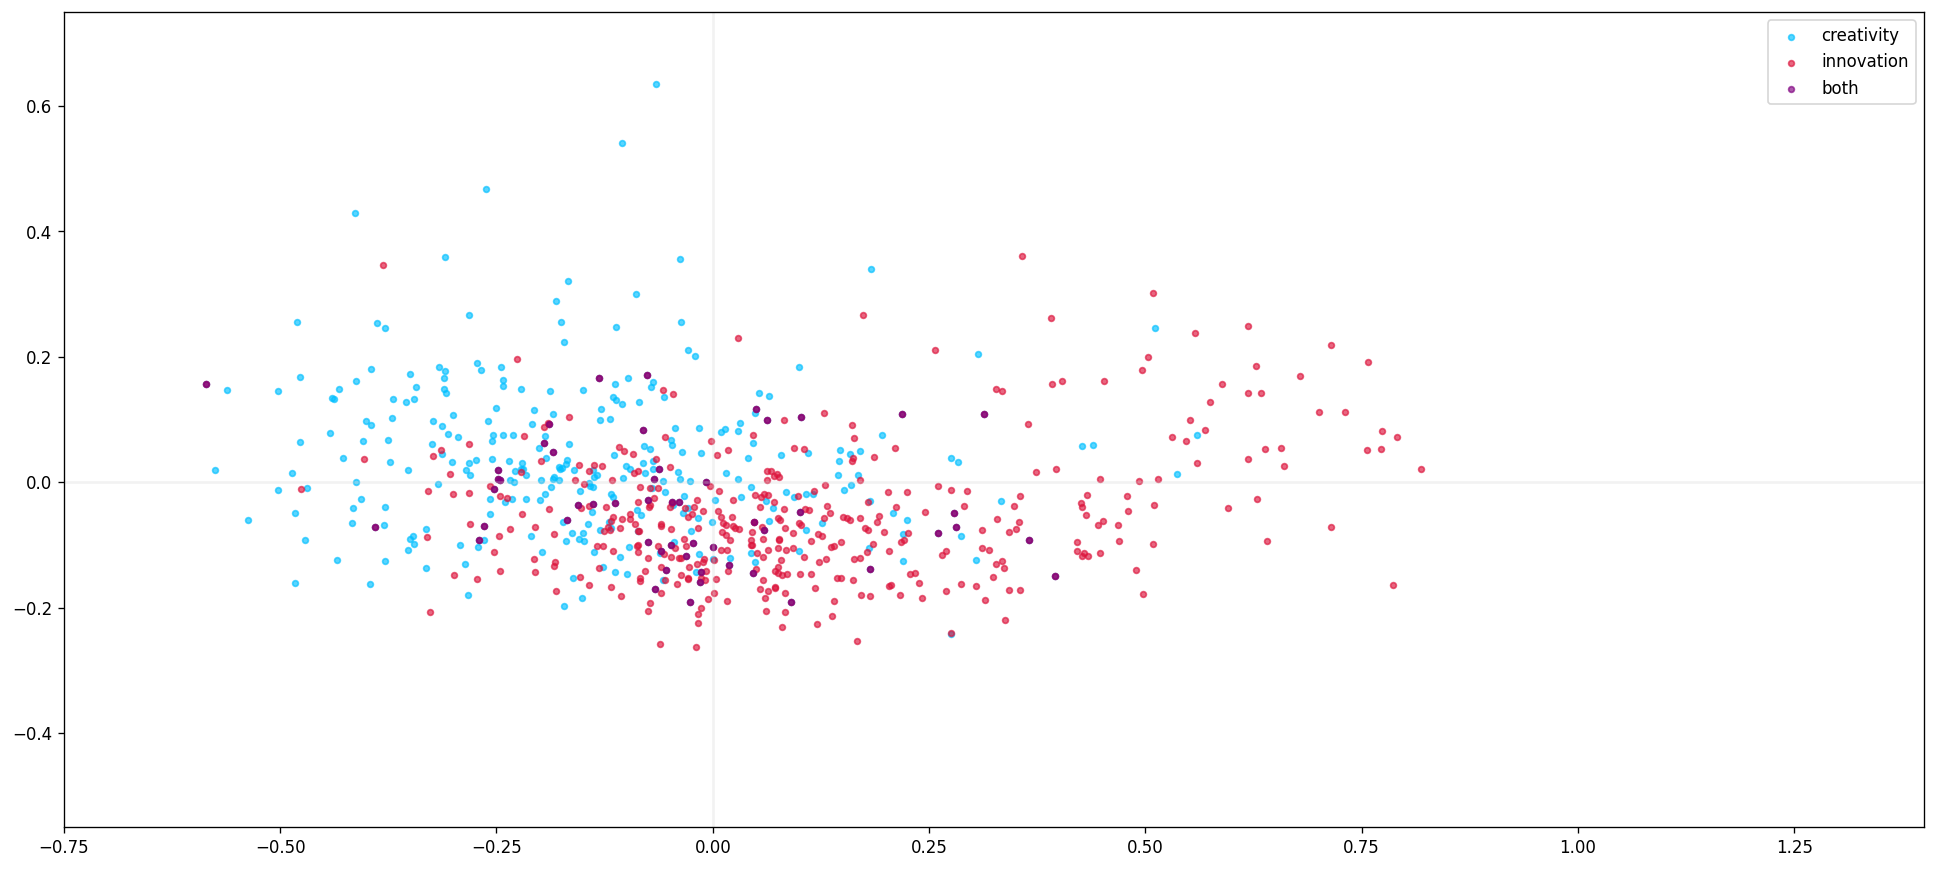

In [5]:
for (x, y), c, l in scatter_data: 
    project.scatterplot1 (x, y, c=c, l=l, xl=(-0.75, 1.40), yl=(-0.55, 0.75))

plt.legend()
plt.show()

<br>

**Individual distributions**

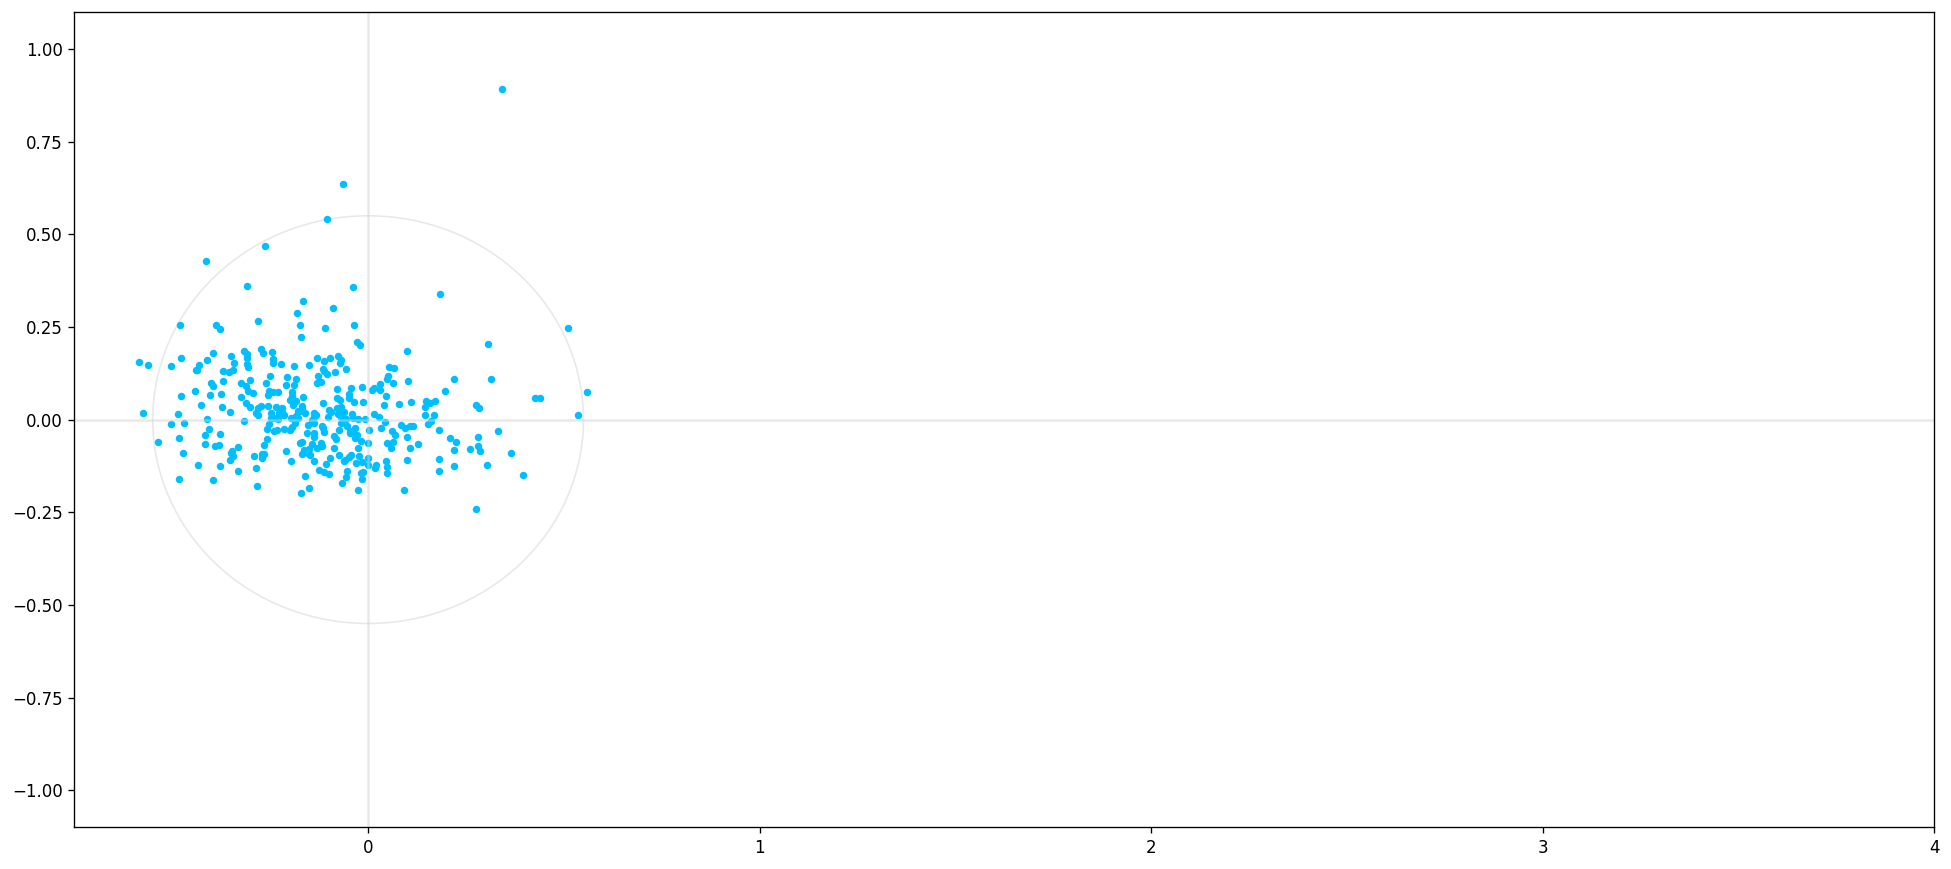

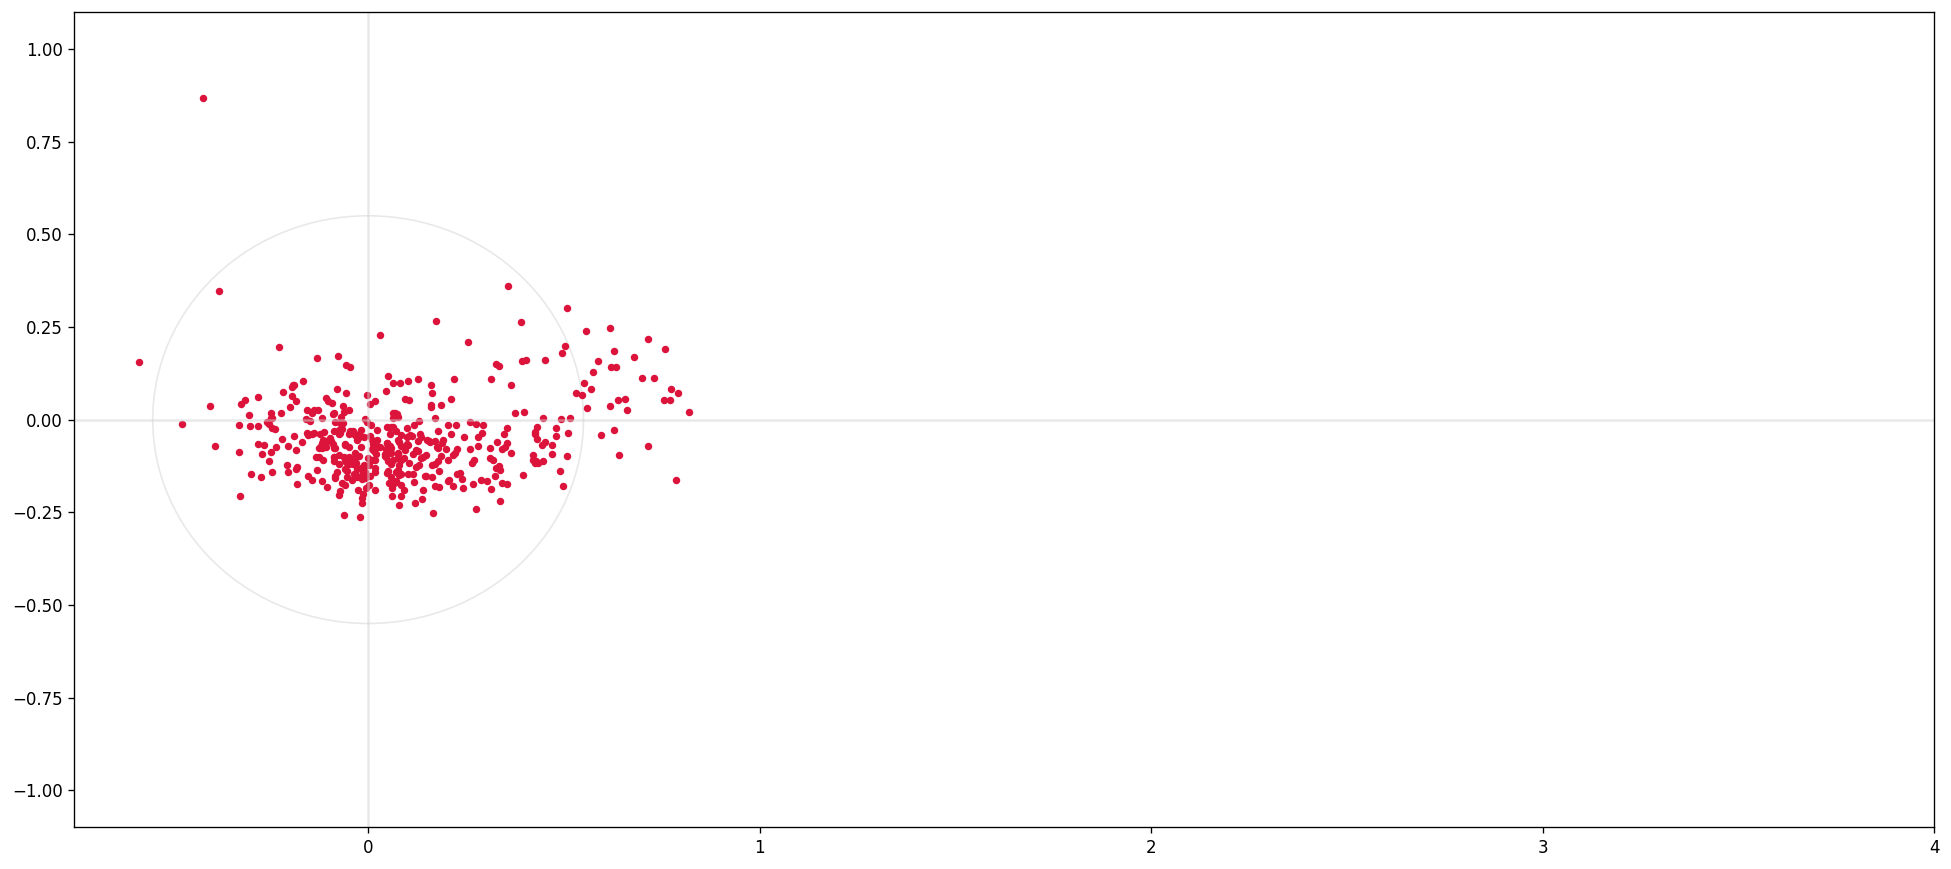

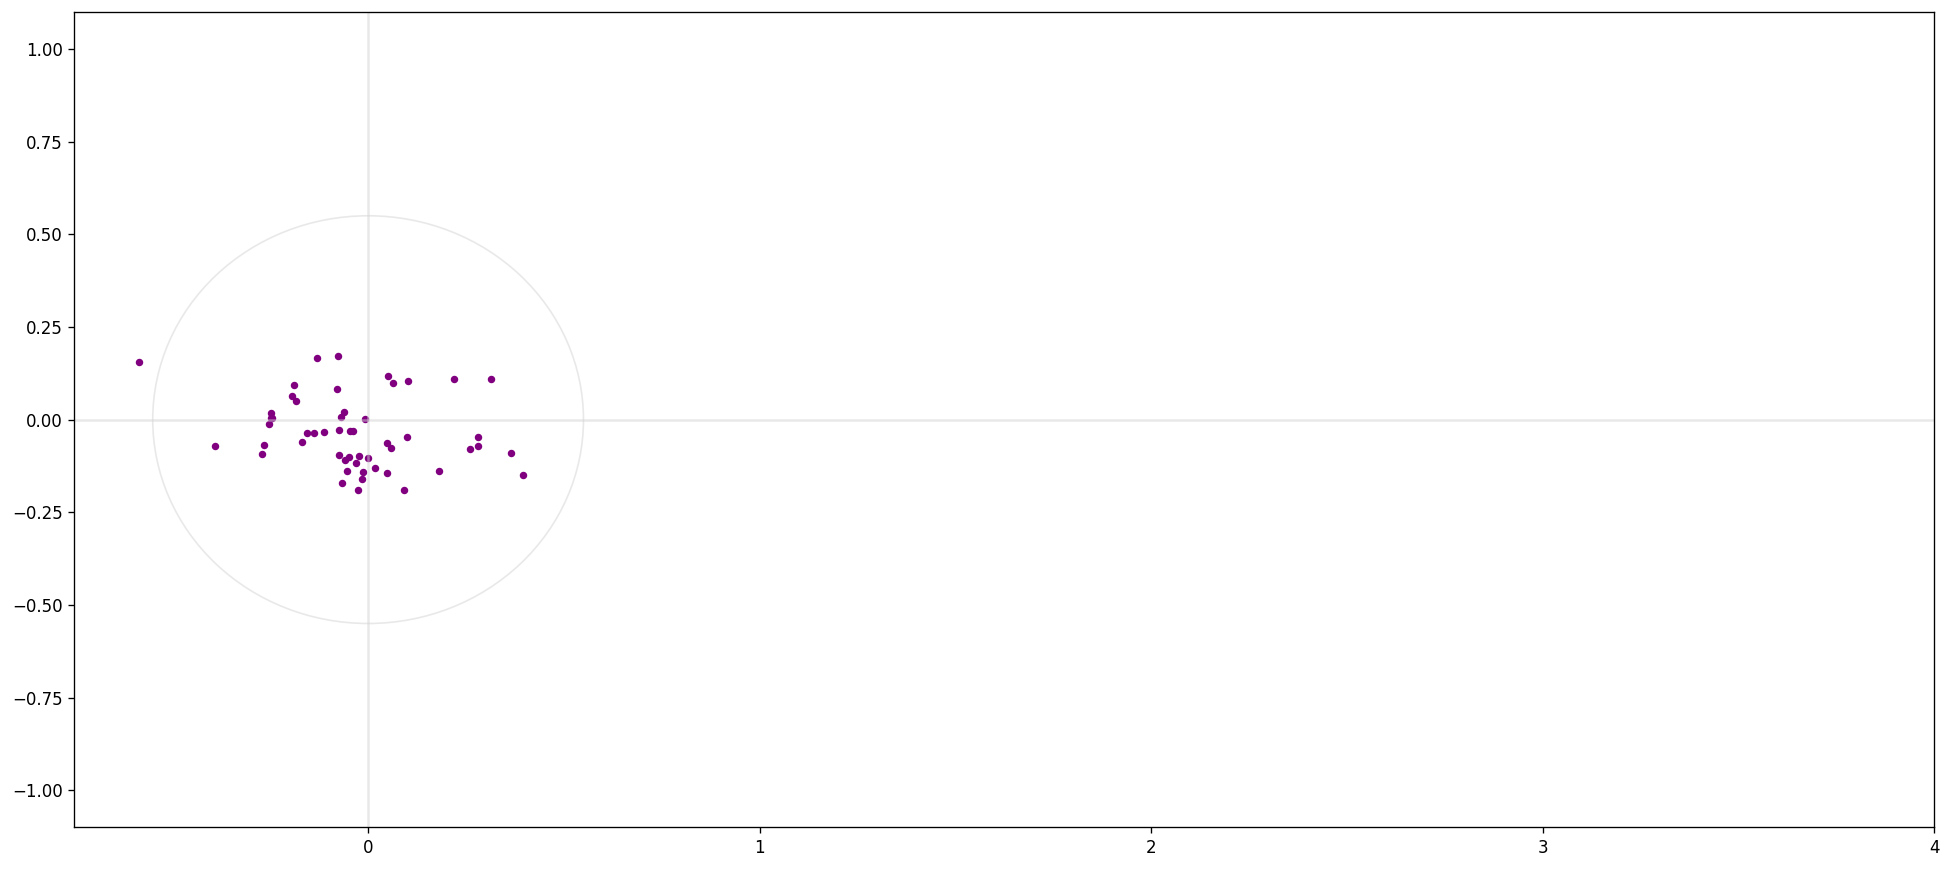

In [6]:
for (x, y), c, l in scatter_data: 
    project.scatterplot2 (x, y, c=c, l=l, xl=(-0.75, 4.00), yl=(-1.10, 1.10))

plt.show()

<br>